In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st 

In [2]:
data=pd.read_csv("DS1_C4_S7_Students_Scores_Data_Practice.csv")
data

,Statistics,Python,Tableau
0,61,86,66
1,54,86,72
2,56,80,78
3,54,85,45
4,53,84,68
...,...,...,...
95,60,76,64
96,59,89,70
97,62,80,46
98,58,89,74


In [3]:
# Task 1
# creating new dataframe for output 
ct_df=pd.DataFrame()
ct_df['Central_Tend']=['Mean','Median','Mode']# adding values in data frame
ct_df.set_index("Central_Tend",inplace= True)# changing the index

l=list(data.columns)# storing column name of original data
for i in range(len(l)):
    a=[]
    # getting mean median mode and storing in list
    a.append(data[l[i]].mean())
    a.append(data[l[i]].median())
    a.append(data[l[i]].mode()[0])
    ct_df[l[i]]=a #adding list into data frame 

ct_df

,Statistics,Python,Tableau
Central_Tend,,,
Mean,60.89,81.84,68.02
Median,60.00,82.00,69.00
Mode,55.00,86.00,65.00


In [4]:
# Task 2 
df=pd.DataFrame()
l=list(data.columns)# storing column name of original data
df["Subject"]=l
df.set_index("Subject",inplace= True)
# getting mean coefficient of variation and variance and storing in dataframe
df["Variance"]=np.round(st.variation(data),2)
df["CV in %"]=np.round((st.variation(data)*100),2)
df["Mean"]=data.mean()
df

,Variance,CV in %,Mean
Subject,,,
Statistics,0.12,11.82,60.89
Python,0.05,5.28,81.84
Tableau,0.11,10.71,68.02


In [5]:
# Task 3
# defining function outlier
def outlier(x,lf,uf):
    a,b=[],[]
    for i in data[x]:
        if i<lf: #checking the value 
            a.append(i) 
        elif i>uf:
            b.append(i)
    return a,b


iqr_df=pd.DataFrame()
iqr_df["Subject"]=l
iqr_df.set_index("Subject",inplace= True)

# getting mean median range and storing in data frame
iqr_df["Min"]=data.min()
iqr_df["Max"]=data.max()
iqr_df["Range"]=data.max()-data.min()
# using quantile to get Q1 and Q3
iqr_df["Q1"]=data.quantile(0.25)
iqr_df["Q3"]=data.quantile(0.75)

iqr_df["IQR"]=iqr_df["Q3"]-iqr_df["Q1"]
iqr_df["LF"]=iqr_df["Q1"]-(1.58*iqr_df["IQR"])
iqr_df["UF"]=iqr_df["Q3"]+(1.58*iqr_df["IQR"])
print(iqr_df)

out=[]
for i in range(len(l)):
    s=l[i]
    #using loc function to get specific value from dataframe
    x=iqr_df.loc[l[i],'LF']
    y=iqr_df.loc[l[i],'UF']
    out.append(outlier(s,x,y))# calling defined function

iqr_df["Outliers"]=out
iqr_df

            Min  Max  Range    Q1     Q3    IQR      LF      UF
Subject                                                        
Statistics   50   74     24  54.0  67.00  13.00  33.460  87.540
Python       75   89     14  78.0  86.00   8.00  65.360  98.640
Tableau      45   79     34  64.0  73.25   9.25  49.385  87.865


,Min,Max,Range,Q1,Q3,IQR,LF,UF,Outliers
Subject,,,,,,,,,
Statistics,50,74,24,54.0,67.00,13.00,33.460,87.540,"([], [])"
Python,75,89,14,78.0,86.00,8.00,65.360,98.640,"([], [])"
Tableau,45,79,34,64.0,73.25,9.25,49.385,87.865,"([45, 46, 46], [])"


<Axes: >

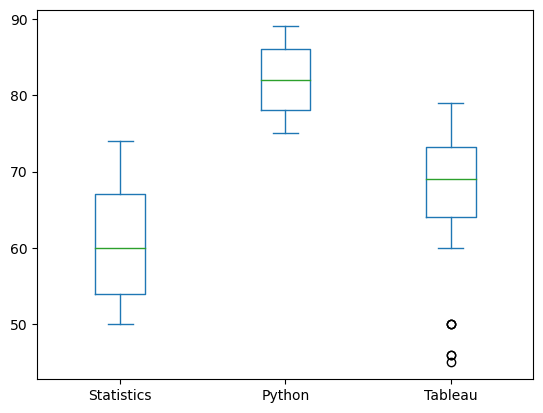

In [6]:
# Task 4
#plotting box plot for each subject
data.plot(kind='box')

<Axes: xlabel='Tableau', ylabel='Density'>

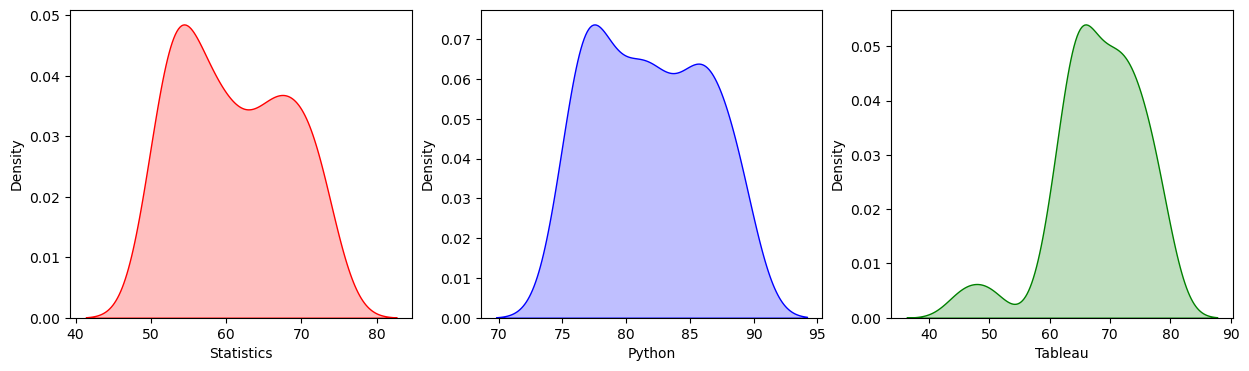

In [7]:
# Task 5
# using seaborn to get kdeplot for each subject
import seaborn as sb
plt.figure(figsize=(15,4))
plt.subplot(131)
sb.kdeplot(data[l[0]],color="red",fill=True)
plt.subplot(132)
sb.kdeplot(data[l[1]],color="blue",fill=True)
plt.subplot(133)
sb.kdeplot(data[l[2]],color="green",fill=True)